In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Erreur lors du chargement des données: {e}")
        return None

In [3]:
# Prétraitement des données
def preprocess_data(df):
    # Supprimer les valeurs manquantes
    df = df.dropna()
    
    # Séparer les features et la target
    X = df.drop('readmitted', axis=1)  # Ajuster selon le nom de votre colonne cible
    y = df['readmitted']
    
    # Encoder les variables catégorielles
    X = pd.get_dummies(X)
    
    # Normaliser les données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, X.columns

In [4]:
# Créer et entraîner le modèle
def train_model(X, y):
    # Diviser les données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer et entraîner le modèle
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

In [5]:
# Évaluer le modèle
def evaluate_model(model, X_test, y_test):
    # Faire des prédictions
    y_pred = model.predict(X_test)
    
    # Afficher le rapport de classification
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))
    
    # Afficher la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.ylabel('Vraies valeurs')
    plt.xlabel('Prédictions')
    plt.show()

# Afficher l'importance des features
def plot_feature_importance(model, feature_names):
    # Obtenir l'importance des features
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Créer le graphique
    plt.figure(figsize=(12, 6))
    plt.title('Importance des facteurs de réadmission')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()


Rapport de classification:
              precision    recall  f1-score   support

          no       0.62      0.70      0.66      2658
         yes       0.60      0.51      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.60      5000
weighted avg       0.61      0.61      0.61      5000



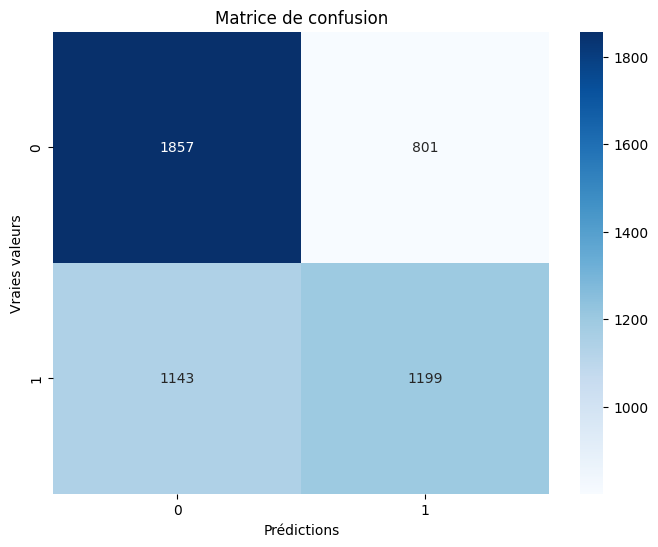

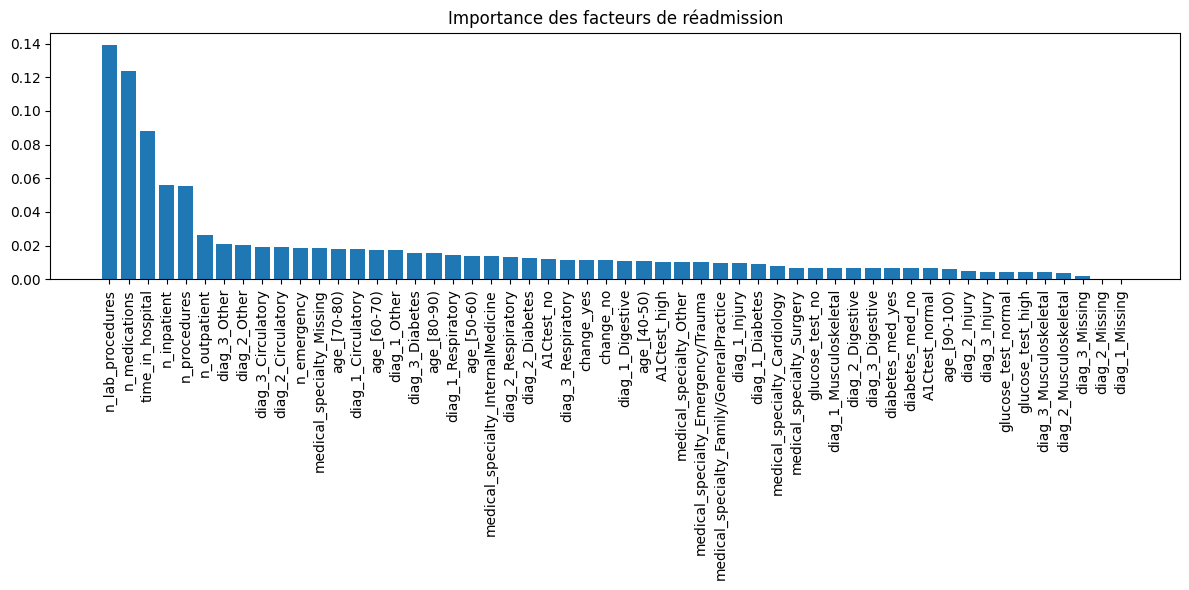

In [6]:
def main():
    # Charger les données
    df = load_data('hospital_readmissions.csv')
    if df is None:
        return
    
    # Prétraiter les données
    X, y, feature_names = preprocess_data(df)
    
    # Entraîner le modèle
    model, X_test, y_test = train_model(X, y)
    
    # Évaluer le modèle
    evaluate_model(model, X_test, y_test)
    
    # Afficher l'importance des features
    plot_feature_importance(model, feature_names)

if __name__ == "__main__":
    main() 